In [30]:
# 라이브러리
import random
from tkinter import *

window = Tk()
window.title("쿠폰 추첨기")
window.geometry("300x200+1200+500")

def on_click():
    name_list = ["강성연", "김준식", "양건모", "오소정","임유빈","정태영","조우성","조효정"]
    name = random.sample(name_list, 2)
    print(name)
    text.delete("1.0", END)
    text.insert(END, name)

# 이미지 넣기 ㅡ png만 가능함
label_img = Label(window)
img = PhotoImage(file="./raw data/tree_coupon.png")
label_img.config(image=img)
label_img.pack(side="left", padx=20)

# 추첨버튼
Button(window, text="추첨", command=on_click).pack(side="bottom")

# 출력
text = Text(window, width=20, height=5, bg="lightyellow")
text.pack(pady=30)

window.mainloop()

['조우성', '임유빈']
['김준식', '조우성']


: 

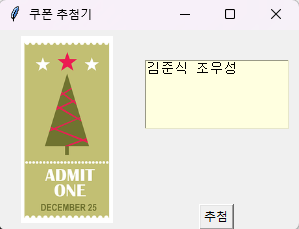

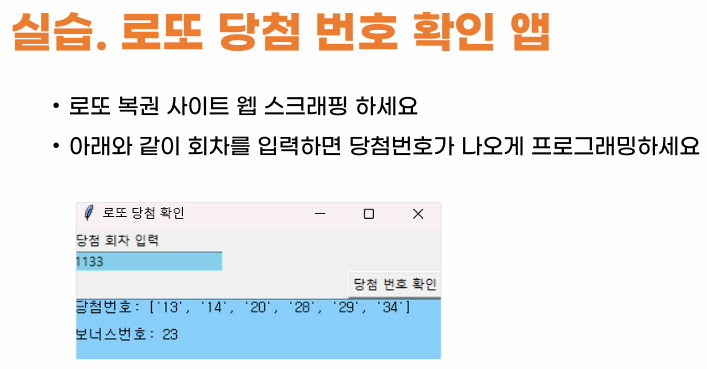

In [60]:
# 실습. 로또 당첨 번호 확인 앱

# 라이브러리
import random
from tkinter import *

# 로또 웹크롤링
def get_lotto_nums(num):
    import requests, time
    from bs4 import BeautifulSoup

    url = f"https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&qvt=0&query={num}%ED%9A%8C%20%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8"
    res = requests.get(url)

    soup = BeautifulSoup(res.text, "html.parser")
    # win_num
    win_nums = [x.text for x in soup.select("div.winning_number span")]
    # bonus_num
    bonus_num = soup.select("div.bonus_number span")[0].text
    return win_nums, bonus_num

window = Tk()
window.title("로또 당첨 확인")
window.geometry("445x200+1200+500")

def on_click():
    entry_text = entry_box.get()
    # 웹크롤링
    win_num, bonus_num = get_lotto_nums(entry_text)
    text.insert(END, f"당첨 번호   : {win_num}\n\n")
    text.insert(END, f"보너스 번호 : {bonus_num}")
    # text.config(text=f"보너스 번호 : {bonus_num}\n")
    

# 텍스트 출력
# label_0 = Label(window, text="")

label_1 = Label(window, text="당첨 회차 입력")
label_1.grid(row=0, column=0, padx=10, pady=5, sticky="NW")

# 회차 입력란
entry_box = Entry(window, width=20, bg="yellow")
entry_box.grid(row=1, column=0, padx=10, pady=5, sticky="NW")

# 당첨 확인 버튼
Button(window, text="당첨번호 확인", command=on_click).grid(row=2, column=0, padx=10, pady=10, sticky="E")

# 출력
text = Text(window, width=60, height=5, bg="lightgreen")
text.grid(row=3, column=0, padx=10, pady=10, sticky="SW")

window.mainloop()